In [1]:
import pandas as pd
import numpy as np

df_X = pd.read_csv('matminer_feature.csv')
df_X = df_X.drop(['Unnamed: 0'],axis=1)
x = df_X.values

from sklearn.impute import SimpleImputer

X =  SimpleImputer(missing_values=np.nan, strategy='median').fit_transform(x)

df_y = pd.read_csv('y.csv')
df_y = df_y.drop(['Unnamed: 0'],axis=1)
y = df_y.values

In [2]:
X.shape, y.shape

((3017, 15), (3017, 1))

In [2]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [10]:
X

array([[0.04084931, 0.00762999, 0.47074656, ..., 0.00793347, 0.0062734 ,
        0.2644458 ],
       [0.09254351, 0.02295282, 0.46032282, ..., 0.07612997, 0.03222653,
        0.0428261 ],
       [0.09285866, 0.2802786 , 0.30454259, ..., 0.16266588, 0.3972718 ,
        0.09403048],
       ...,
       [0.05863551, 0.53045903, 0.09817977, ..., 0.66943253, 0.36832116,
        0.42513925],
       [0.00873032, 0.48735255, 0.2158784 , ..., 0.38569003, 0.34161748,
        0.75622107],
       [0.01901079, 0.12291427, 0.09158666, ..., 0.13393649, 0.13917737,
        0.60210054]])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [4]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [15]:
y_pred = mnb.predict(X_test)
y_predprob = mnb.predict_proba(X_test)[:,1]

In [16]:
from sklearn import metrics

print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.8146
AUC Score (Train): 0.724176


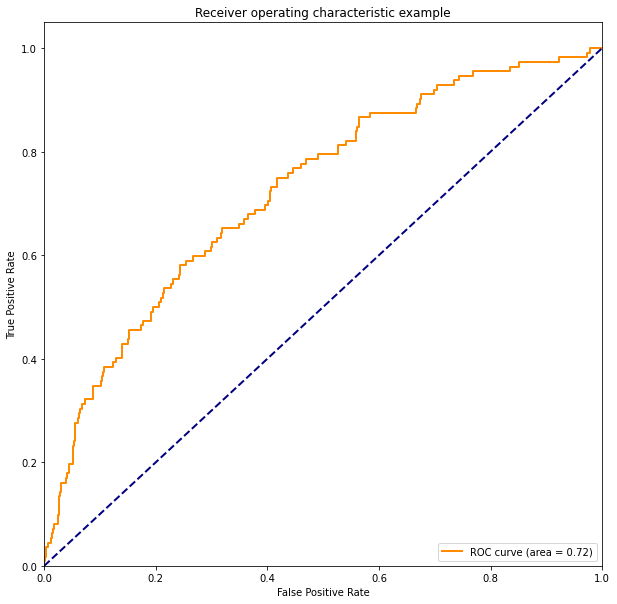

In [17]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predprob)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot  as plt

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_test = {'alpha': [0,0.1,0.5,1,2]}
gsearch = GridSearchCV(estimator =MultinomialNB(),param_grid = param_test,scoring='roc_auc',cv=5)
gsearch.fit(X,y)
gsearch.best_params_, gsearch.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passe

({'alpha': 0}, 0.7395583634246463)

In [21]:
param_test2 = {'fit_prior': ['True','False']}
gsearch2 = GridSearchCV(estimator =MultinomialNB(alpha=0),param_grid = param_test2,scoring='roc_auc',cv=5)
gsearch2.fit(X,y)
gsearch2.best_params_, gsearch2.best_score_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passe

({'fit_prior': 'True'}, 0.7395583634246463)

In [5]:
mnb1 = MultinomialNB(alpha=0)
mnb1.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


MultinomialNB(alpha=0)

In [6]:
y_pred1 = mnb1.predict(X_test)
y_predprob1 = mnb1.predict_proba(X_test)[:,1]

In [8]:
from sklearn import metrics

print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred1))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob1))

Accuracy : 0.8146
AUC Score (Train): 0.724811


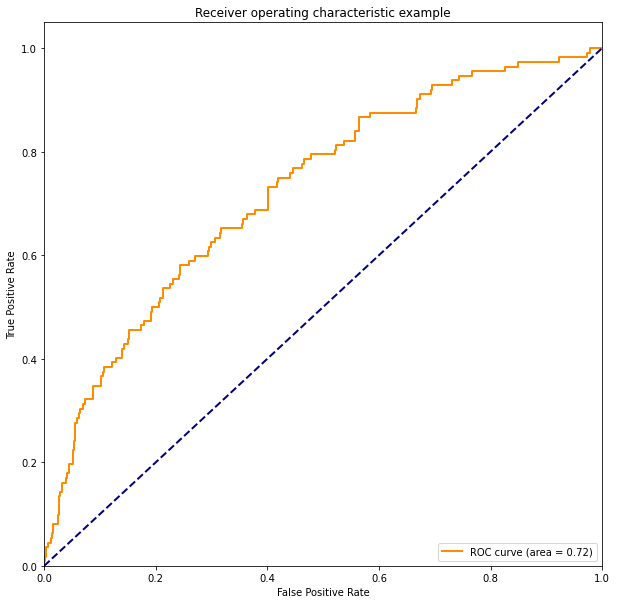

In [10]:
fpr1,tpr1,threshold1=metrics.roc_curve(y_test,y_predprob1)
roc_auc1=metrics.auc(fpr1,tpr1)

import matplotlib.pyplot  as plt

plt.figure(figsize=(10,10))
plt.plot(fpr1, tpr1, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc1) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()